In [3]:
import numpy as np
import matplotlib.pyplot as plt
from kontrol import *
from kontrol.model import make_weight
from control import *
import dtt2hdf
import sys
sys.path.append('./data')
sys.path.append('/home/terrencetec/Dropbox/Pyground/kontrol/examples/data')

In [4]:
sys.path

['/home/terrencetec/Dropbox/Pyground/kontrol/examples',
 '/home/terrencetec/miniconda3/envs/kontrol/lib/python39.zip',
 '/home/terrencetec/miniconda3/envs/kontrol/lib/python3.9',
 '/home/terrencetec/miniconda3/envs/kontrol/lib/python3.9/lib-dynload',
 '',
 '/home/terrencetec/miniconda3/envs/kontrol/lib/python3.9/site-packages',
 '/home/terrencetec/miniconda3/envs/kontrol/lib/python3.9/site-packages/IPython/extensions',
 '/home/terrencetec/.ipython',
 './data',
 '/home/terrencetec/Dropbox/Pyground/kontrol/examples/data']

In [14]:
items = dtt2hdf.read_diaggui('BS_IP_noise_20200721.xml')
f = items.results.PSD['K1:VIS-BS_IP_BLEND_ACCL_IN1'].FHz
noise_lvdtt_data = items.results.PSD['K1:VIS-BS_IP_BLEND_LVDTT_IN1'].PSD[0]
noise_geot_data = items.results.PSD['K1:VIS-BS_IP_BLEND_ACCT_IN1'].PSD[0]

mask = (f > 1e-2) & (f < 1e1)
f = f[mask]
noise_lvdtt_data = noise_lvdtt_data[mask]
noise_geot_data = noise_geot_data[mask]

FileNotFoundError: [Errno 2] No such file or directory: 'BS_IP_noise_20200721.xml'

In [3]:
from kontrol.model import noise2zpk

In [4]:
weight = np.exp(-f)
# weight = None
# weight = 1/f
noise_lvdtt_fit=noise2zpk(f, noise_lvdtt_data, max_order=6, weight=weight)
noise_geot_fit=noise2zpk(f, noise_geot_data, max_order=6, weight=weight)

Optimization terminated successfully.
         Current function value: 9.706337
         Iterations: 18
         Function evaluations: 5197
Optimization terminated successfully.
         Current function value: 9.297857
         Iterations: 10
         Function evaluations: 2760


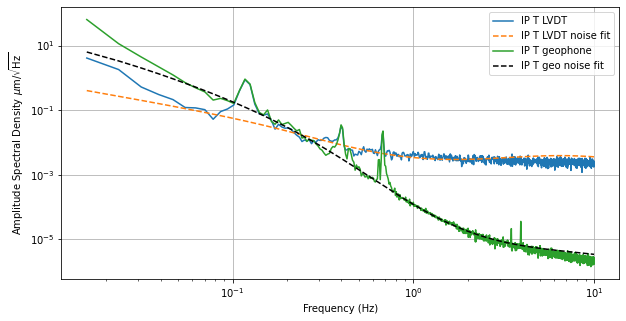

In [8]:
plt.figure(figsize=(10,5))
plt.loglog(f, noise_lvdtt_data, label='IP T LVDT')
plt.loglog(f, abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0]), '--', label='IP T LVDT noise fit')
plt.loglog(f, noise_geot_data, label='IP T geophone')
plt.loglog(f, abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0]), 'k--', label='IP T geo noise fit')
plt.ylabel('Amplitude Spectral Density $\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()

In [35]:
from kontrol.filter import h2complementary
h1, h2 = h2complementary(noise_lvdtt_fit/noise_geot_fit, noise_geot_fit/noise_lvdtt_fit)

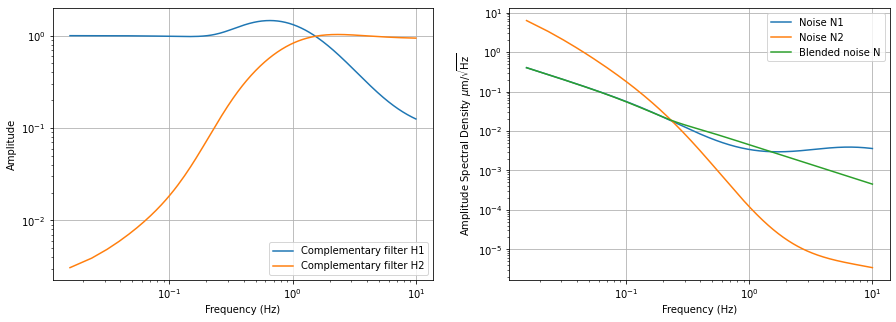

In [43]:
h1, h2 = h2complementary(noise_lvdtt_fit, noise_geot_fit)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.loglog(f, abs(h1.horner(2*np.pi*1j*f)[0][0]), label='Complementary filter H1')
plt.loglog(f, abs(h2.horner(2*np.pi*1j*f)[0][0]), label='Complementary filter H2')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()
# plt.loglog(_f, abs(h2_aug.horner(2*np.pi*1j*_f)[0][0]))
# plt.loglog(_f, abs((h1+h2_aug).horner(2*np.pi*1j*_f)[0][0]))

# plt.ylim(0.1,10)
plt.subplot(122)
plt.loglog(f, abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0]), label='Noise N1')
plt.loglog(f, abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0]), label='Noise N2')
plt.loglog(f, quad_sum(abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0])*abs(h1.horner(2*np.pi*1j*f)[0][0]),
                        abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0])*abs(h2.horner(2*np.pi*1j*f)[0][0])),
           label='Blended noise N')
plt.ylabel('Amplitude Spectral Density $\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()

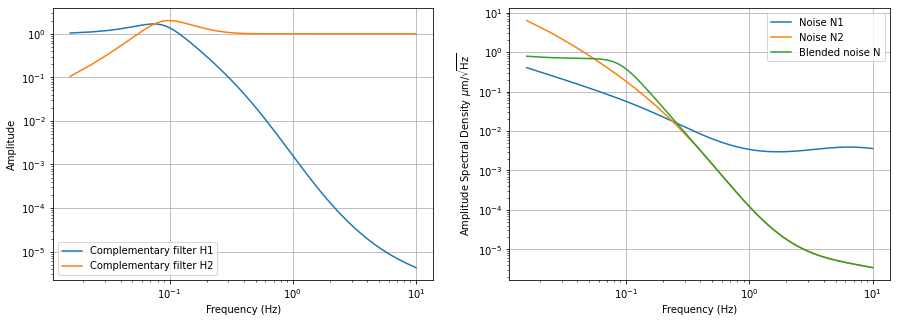

In [45]:
h1, h2 = h2complementary(noise_lvdtt_fit/noise_geot_fit, noise_geot_fit)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.loglog(f, abs(h1.horner(2*np.pi*1j*f)[0][0]), label='Complementary filter H1')
plt.loglog(f, abs(h2.horner(2*np.pi*1j*f)[0][0]), label='Complementary filter H2')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()
# plt.loglog(_f, abs(h2_aug.horner(2*np.pi*1j*_f)[0][0]))
# plt.loglog(_f, abs((h1+h2_aug).horner(2*np.pi*1j*_f)[0][0]))

# plt.ylim(0.1,10)
plt.subplot(122)
plt.loglog(f, abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0]), label='Noise N1')
plt.loglog(f, abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0]), label='Noise N2')
plt.loglog(f, quad_sum(abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0])*abs(h1.horner(2*np.pi*1j*f)[0][0]),
                        abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0])*abs(h2.horner(2*np.pi*1j*f)[0][0])),
           label='Blended noise N')
plt.ylabel('Amplitude Spectral Density $\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()

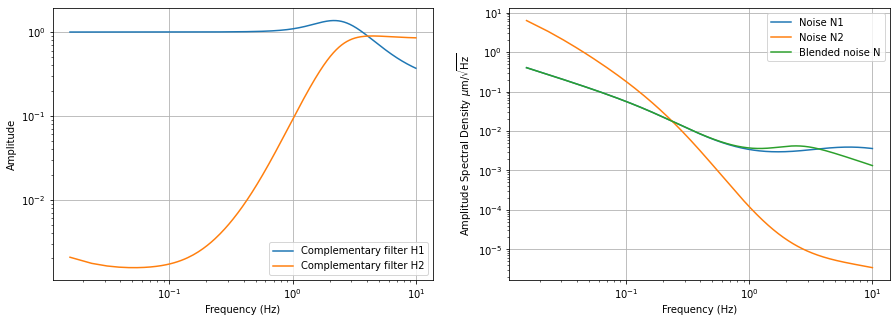

In [46]:
h1, h2 = h2complementary(noise_lvdtt_fit, noise_geot_fit/noise_lvdtt_fit)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.loglog(f, abs(h1.horner(2*np.pi*1j*f)[0][0]), label='Complementary filter H1')
plt.loglog(f, abs(h2.horner(2*np.pi*1j*f)[0][0]), label='Complementary filter H2')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()
# plt.loglog(_f, abs(h2_aug.horner(2*np.pi*1j*_f)[0][0]))
# plt.loglog(_f, abs((h1+h2_aug).horner(2*np.pi*1j*_f)[0][0]))

# plt.ylim(0.1,10)
plt.subplot(122)
plt.loglog(f, abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0]), label='Noise N1')
plt.loglog(f, abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0]), label='Noise N2')
plt.loglog(f, quad_sum(abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0])*abs(h1.horner(2*np.pi*1j*f)[0][0]),
                        abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0])*abs(h2.horner(2*np.pi*1j*f)[0][0])),
           label='Blended noise N')
plt.ylabel('Amplitude Spectral Density $\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()

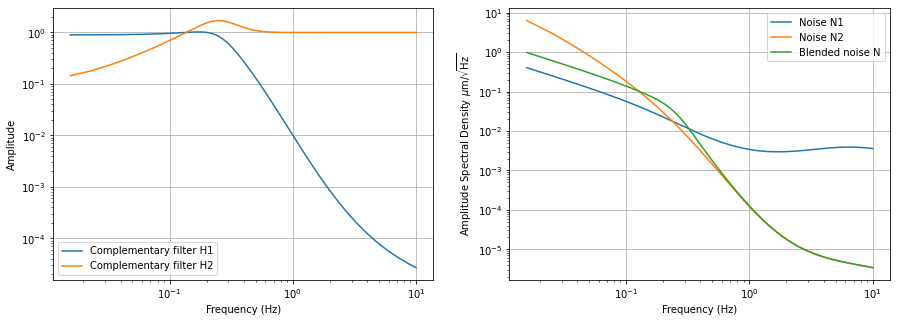

In [47]:
h1, h2 = h2complementary(noise_lvdtt_fit/noise_geot_fit, noise_geot_fit/noise_lvdtt_fit)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.loglog(f, abs(h1.horner(2*np.pi*1j*f)[0][0]), label='Complementary filter H1')
plt.loglog(f, abs(h2.horner(2*np.pi*1j*f)[0][0]), label='Complementary filter H2')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()
# plt.loglog(_f, abs(h2_aug.horner(2*np.pi*1j*_f)[0][0]))
# plt.loglog(_f, abs((h1+h2_aug).horner(2*np.pi*1j*_f)[0][0]))

# plt.ylim(0.1,10)
plt.subplot(122)
plt.loglog(f, abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0]), label='Noise N1')
plt.loglog(f, abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0]), label='Noise N2')
plt.loglog(f, quad_sum(abs(noise_lvdtt_fit.horner(2*np.pi*1j*f)[0][0])*abs(h1.horner(2*np.pi*1j*f)[0][0]),
                        abs(noise_geot_fit.horner(2*np.pi*1j*f)[0][0])*abs(h2.horner(2*np.pi*1j*f)[0][0])),
           label='Blended noise N')
plt.ylabel('Amplitude Spectral Density $\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$')
plt.xlabel('Frequency (Hz)')
plt.legend(loc=0)
plt.grid()

In [15]:
noise_geot_fit_aug = (noise_geot_fit
                      *tf([1, -noise_geot_fit.pole()[-1]],[1])
                      *tf([1, -noise_geot_fit.pole()[-2]],[1])
                      *tf([1, -noise_geot_fit.pole()[-3]],[1])
                      *tf([1],[1,2*np.pi*min(f)])**3)

In [10]:
noise_geot_fit.pole()

array([-6.26428389e+02, -6.15340449e+02, -5.40209303e+02, -3.41382445e+02,
       -1.75751679e+02, -1.14360168e+02, -2.28573939e+00, -8.38854607e-01,
       -1.06210061e-01, -1.07333037e-02])

Text(0.5, 0, 'Frequency (Hz)')

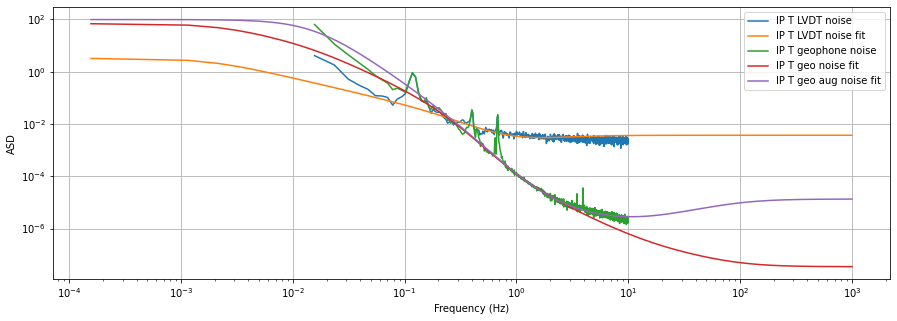

In [23]:
_f=np.linspace(min(f)*1e-2, max(f)*1e2, 1000000)

plt.figure(figsize=(15,5))
plt.loglog(f, noise_lvdtt_data, label='IP T LVDT noise')
plt.loglog(_f, abs(noise_lvdtt_fit.horner(2*np.pi*1j*_f)[0][0]), label='IP T LVDT noise fit')
plt.loglog(f, noise_geot_data, label='IP T geophone noise')
plt.loglog(_f, abs(noise_geot_fit.horner(2*np.pi*1j*_f)[0][0]), label='IP T geo noise fit')
plt.loglog(_f, abs(noise_geot_fit_aug.horner(2*np.pi*1j*_f)[0][0]), label='IP T geo aug noise fit')


plt.legend(loc=0)
plt.grid()
plt.ylabel('ASD')
plt.xlabel('Frequency (Hz)')

In [51]:
noise_geot_tf = tf([1,2,3,4,5],[1,2,3,4,5,6])
x0 = list(noise_geot_tf.num[0][0])+list(noise_geot_tf.den[0][0])
weight = make_weight(f, ((0.07, 0.9), 0))
res = minimize(cost, args=(noise_geot_tf, f, noise_geot_data, weight), x0=x0)
res.x

array([ 1.02350981e-07, -4.04097319e-02,  8.61603423e-01, -9.94982268e+00,
        1.22283911e+01,  1.06055449e+00,  3.11836096e+02,  3.18296152e+02,
       -6.33870797e+01,  1.77895813e+00, -7.84834231e-01])

In [26]:
from kontrol.filter import h2complementary
h1, h2 = h2complementary(noise_lvdtt_fit/noise_geot_fit, noise_geot_fit/noise_lvdtt_fit)

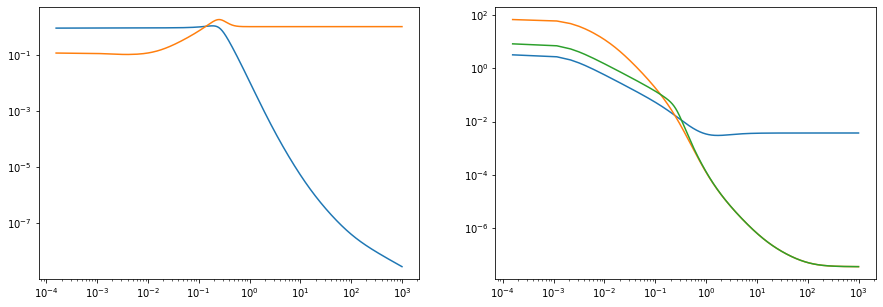

In [29]:
# f=np.logspace(-3,3,1000)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.loglog(_f, abs(h1.horner(2*np.pi*1j*_f)[0][0]))
plt.loglog(_f, abs(h2.horner(2*np.pi*1j*_f)[0][0]))
# plt.loglog(_f, abs(h2_aug.horner(2*np.pi*1j*_f)[0][0]))
# plt.loglog(_f, abs((h1+h2_aug).horner(2*np.pi*1j*_f)[0][0]))

# plt.ylim(0.1,10)
plt.subplot(122)
plt.loglog(_f, abs(noise_lvdtt_fit.horner(2*np.pi*1j*_f)[0][0]))
plt.loglog(_f, abs(noise_geot_fit.horner(2*np.pi*1j*_f)[0][0]))
plt.loglog(_f, quad_sum(abs(noise_lvdtt_fit.horner(2*np.pi*1j*_f)[0][0])*abs(h1.horner(2*np.pi*1j*_f)[0][0]),
                        abs(noise_geot_fit.horner(2*np.pi*1j*_f)[0][0])*abs(h2.horner(2*np.pi*1j*_f)[0][0])))

NameError: name 'h2_aug' is not defined

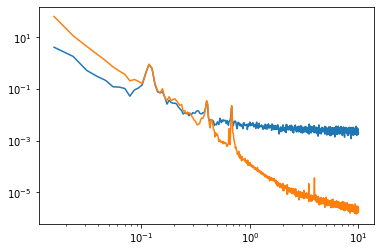

In [19]:
plt.loglog(f, noise_lvdtt_data)
plt.loglog(f, noise_geot_data)
plt.loglog(f, quad_sum(noise_lvdtt_data*abs(h1.horner(2*np.pi*1j*f)[0][0]),
                        noise_geot_data*abs(h2_aug.horner(2*np.pi*1j*f)[0][0])))

In [217]:
h2.zero()

array([-6.68240104e+02+1.79821281e+01j, -6.68240104e+02-1.79821281e+01j,
       -6.45620210e+02+4.56038445e+01j, -6.45620210e+02-4.56038445e+01j,
       -6.46097271e+02+0.00000000e+00j, -6.07679922e+02+5.31177341e+01j,
       -6.07679922e+02-5.31177341e+01j, -5.67572658e+02+3.63758170e+01j,
       -5.67572658e+02-3.63758170e+01j, -5.48000303e+02+0.00000000e+00j,
       -4.90176532e+02+2.18602431e+00j, -4.90176532e+02-2.18602431e+00j,
       -2.38841087e+02+8.30967010e-02j, -2.38841087e+02-8.30967010e-02j,
       -1.13204414e+02+1.23348839e+00j, -1.13204414e+02-1.23348839e+00j,
       -9.82370432e+01+4.97576627e+00j, -9.82370432e+01-4.97576627e+00j,
       -8.93348926e+01+6.62543160e+00j, -8.93348926e+01-6.62543160e+00j,
       -8.03248167e+01+3.76737529e+00j, -8.03248167e+01-3.76737529e+00j,
       -7.18553699e+01+9.30414902e-01j, -7.18553699e+01-9.30414902e-01j,
       -4.92092679e+01+1.02051880e-02j, -4.92092679e+01-1.02051880e-02j,
       -1.51622758e+00+2.34308128e+00j, -1.51622758

In [20]:
h2_aug = h2/tf([1, -h2.zero()[-1]],[1])/tf([1, -h2.zero()[-2]],[1])/tf([1, -h2.zero()[-3]],[1])/tf([1, -h2.zero()[-4]],[1])
# h2_aug = h2/tf([1/1.02740754e-2, 1],[1])/tf([1/1.60787326e-2, 1],[1])/tf([1/1.65289665e-1, 1],[1])
h2_aug = h2_aug*tf([1,0],[1])**4

In [187]:
h2.zero()[-2]

(-0.016080250937094934+0j)

In [39]:
noise_lvdtt_fit.pole()

array([-1.28800324e+01+0.j        ,  1.02358516e-07+0.75129115j,
        1.02358516e-07-0.75129115j, -1.41929067e-06+0.11407442j,
       -1.41929067e-06-0.11407442j])

In [7]:
# def make_weight(x, *segments, default_weight=1.):
#     """Make weighting functions for data fitting
    
#     Parameters
#     ----------
#         x: list or np.ndarray
#             The data points for evaluation
#         *segments: tuples of (tuple of (float, float), float)
#             Set weights values for segments of the data. 
#             The first entry specify the bound of the segment.
#             The second entry specify the weight of the segment.
#             Use np.inf for unbounded segments.
#         default_weight: float, optional
#             The default value of the weighting function.
#             Defaults to be 1.
    
#     Returns
#     -------
#         weight: np.ndarray
#             The weighting function as specfied.
#     """

#     weight = np.ones_like(x) * default_weight
    
#     for seg in segments:
#         lower = seg[0][0]
#         upper = seg[0][1]
#         weight_val = seg[1]
#         if lower > upper:
#             _ = lower
#             lower = upper
#             upper = _
#         mask_bool = (x >= lower) & (x <= upper) 
#         mask_value = mask_bool * weight_val
#         weight *= np.logical_not(mask_bool)
#         weight += mask_value
    
#     return(weight)

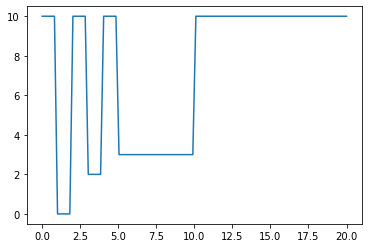

In [8]:
x = np.linspace(0,20, 100)
weight = make_weight(x, ((1, 2), 0), ((3, 4), 2), ((5, 10), 3), default_weight=10)
plt.plot(x, weight)
# plt.plot(weight)

In [37]:
a=[1,2,3,4]
a[1:3]=[4,5]
a

[1, 4, 5, 4]

In [45]:
mask=(f>0)&(f<10)
f*np.logical_not(mask)

array([  0.        ,   0.        ,   0.        , ...,  99.99218628,
        99.99999939, 100.0078125 ])